# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: The t-test family
### VIDEO: One-sample t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

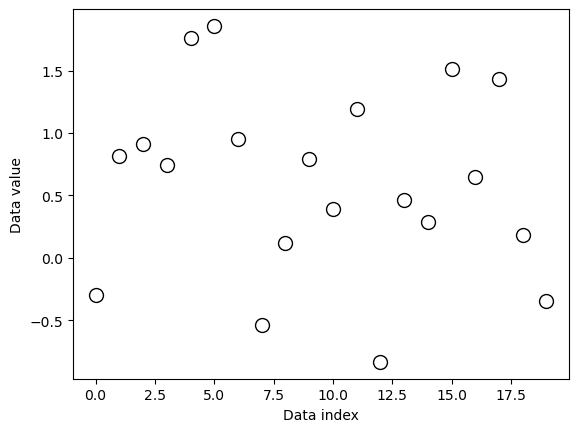

In [15]:
## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data  = np.random.randn(N) + popMu # the data spread around the mean - we use the mean plus random gaussian distributed noise

# let's see what the data look(s) like
plt.plot(data,'ko',markerfacecolor='w',markersize=10) # markerface color makes the dots/datapoints white filled circles
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

### NOTE: there should not be lines in between the points because there is no intrinsic relationship between the points or intermittent values between them of note in this context.


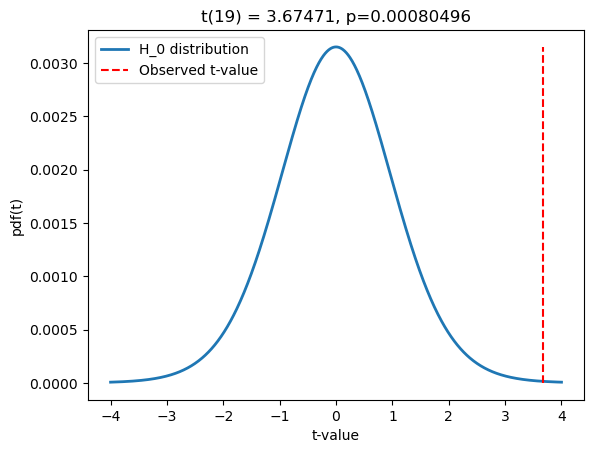

In [16]:
## "manual" t-test - compute the t-statistic and the t-value manually

# the null-hypothesis value - we are stating that the mean of the population is zero
H0val = 0 # testing against a mean of 0 in this case

# compute the t-value -this is the formula of the t-statistic broken up into the numerator and denominator in order to make this easier to read.
t_num = np.mean(data) - H0val # numerator, mean of the sample data minus the null hypothesis mean value (the mean of the pop.)
# as usual we include the degrees of freedom as 1 if computing a sample std as we are here
t_den = np.std(data,ddof=1) / np.sqrt(N) # denominator - std dev of sample data divided by square root of n
tval = t_num / t_den # the t-value or t-statistic (based on the mean of a sample set compared against that of the null hypothesis/pop mean) that we are going to see if it is probable given the null hypothesis is true

# degrees of freedom
df = N-1 # the dof of a one sample t-test is ALWAYS n-1 because if we know the mean, we don't need all N data points (given mean and n-1 data points we can get the one missing data point)

# p-value (shown as p=... in the legend in plot) - see https://www.udemy.com/course/statsml_x/learn/lecture/20025054?start=975#content at 16:40
# note that using abs() means we are only considering the positive tail, not both tails on either end.
pval = 1-stats.t.cdf(abs(tval),df) # we evaluate the tvalue (on the right side) against the cumulative density function
# ex: if we get .99 from this, that means 99% of the t-values under the null hypothesis are smaller than our observed t-value
# use 1 - .99 then to get the probability of getting a t statistic larger than this value given the null hypothesis (i.e. .01 or 1%)

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2) # blue distribution curve: the null hypothesis distrubution or the probability curve of a value we can expect under the null hypothesis (a random val you get when the pop has a mean of 0)
plt.plot([tval,tval],[0,max(tdist)],'r--') # t-statistic shown as a dotted vertical line.
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval)) # probability of observing a t-statistic or test-statistic (the value of t(19)) or larger, given the null hyptohesis is true, is the p= value (the probability of this is shown as p=...)
plt.show()

In [ ]:
## now using the Python function

## In practice, we just use this function from stats scipy package:
# This outputs the tvalue (t) and p-value (p) given the data and null hypothesis val passed in
t,p = stats.ttest_1samp(data,H0val)
# note that the pvalue will be different from the manual calculation above because this is a two sided t-test (both tails) and the pvalue above is calculated as one sided (using abs())

print(t,p)
# do these values match our manually computed values?